## Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("../Sampling/Climbers.csv", sep=";")

#### Canviem el nom de les columnes per fer la manipulació més fàcilment

In [3]:
df.columns = ['Timestamp', 'Sex', 'Height', 'Weight', 'Arm_span','Time_climbing', 'Indoor_vs_outdoor',
              'Hardest_V_Grade_ever','Hardest_V_Grade_last3months','V_Grade_sent_90perc_routes',
              'Hardest_Ewbank_Grade_ever','Hardest_Ewbank_Grade_last3months','Ewbank_Grade_sent_90perc_routes',
              'Freq_climbing_sessions_w','Avg_hours_climbing_w','Avg_hours_training_for_climbing_w',
              'Freq_Hangboard_w', 'Hangboard_grips_used','Style_Hangboard','Max_Weight_Hangboard_18mm_Half_crimp',
              'Max_Weight_Hangboard_18mm_Open_crimp','Min_Edge_mm,kg_Half_crimp','Min_Edge_mm,kg_Open_crimp',
              'Freq_CampusBoard_w', 'Time_CampusBoard_h','Freq_Endurance_session_w','Endurance_training', 
              'Freq_General_Strength_Training_w','Time_General_Strength_Training_h','Type_StrengthTraining', 
              'Other_activities','Max_PullUp_reps', 'Max_weighted_PullUps_5rep', 'Max_PushUp_reps',
              'Max_L-sit_time']

#### Convertim les columnes objecte a nombre

In [4]:
df['Sex'] = df['Sex'].astype('category').cat.codes # 0 = Female, 1 = Male
df.Height = pd.to_numeric(df.Height, errors='coerce')
df.Weight = pd.to_numeric(df.Weight, errors='coerce')
df.Arm_span = pd.to_numeric(df.Arm_span, errors='coerce')
df.Hardest_Ewbank_Grade_ever = pd.to_numeric(df.Hardest_Ewbank_Grade_ever, errors='coerce')
df.Hardest_Ewbank_Grade_last3months = pd.to_numeric(df.Hardest_Ewbank_Grade_last3months, errors='coerce')
df.Ewbank_Grade_sent_90perc_routes = pd.to_numeric(df.Ewbank_Grade_sent_90perc_routes, errors='coerce')

In [5]:
def createTime(time):
    start = time.find("- ") + len("- ")
    end = time.find(" years")
    substring = time[start:end]
    return int(math.ceil(float(substring)))

In [6]:
df['Time_climbing'] = df['Time_climbing'].replace('More than 15 years', '- 15 years')
df['Time_climbing'] = df['Time_climbing'].apply(lambda x: createTime(x))

#### Seleccionem les columnes numèriques únicament

In [7]:
df_no_object = df.select_dtypes(exclude=['object'])
df_no_object = df_no_object.dropna()

In [8]:
df_no_object

,Sex,Height,Weight,Arm_span,Time_climbing,Hardest_Ewbank_Grade_ever,Hardest_Ewbank_Grade_last3months,Ewbank_Grade_sent_90perc_routes,Freq_climbing_sessions_w,Avg_hours_climbing_w,Avg_hours_training_for_climbing_w,Freq_Hangboard_w,Freq_CampusBoard_w,Time_CampusBoard_h,Freq_Endurance_session_w,Freq_General_Strength_Training_w,Time_General_Strength_Training_h
2,1,178.0,67.0,175.0,1,21.0,21.0,19.0,3,4,3,2,0,0,2,3,2
3,1,173.0,70.0,178.0,10,21.0,21.0,18.0,2,6,1,1,0,0,1,0,0
7,1,186.0,88.0,192.0,2,23.0,22.0,21.0,3,8,8,1,0,0,2,3,4
8,1,185.0,60.0,180.0,1,21.0,21.0,18.0,1,3,1,0,0,0,0,1,1
10,1,178.0,81.6,178.0,6,25.0,23.0,21.0,2,4,0,1,0,0,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,1,172.0,82.5,191.7,3,22.0,22.0,19.0,2,4,2,1,0,0,0,5,10
585,1,165.0,63.0,165.0,9,31.0,31.0,30.0,4,12,4,1,1,1,0,1,1
586,1,164.0,68.0,164.0,5,29.0,29.0,25.0,2,3,4,3,0,0,2,1,1
587,1,178.0,65.0,182.0,4,27.0,26.0,23.0,3,4,2,7,0,0,1,0,0


#### Eliminem els outliers

In [9]:
df_no_object.Height.describe()

count     393.000000
mean      178.840992
std        58.779576
min         1.680000
25%       172.000000
50%       178.000000
75%       183.000000
max      1295.000000
Name: Height, dtype: float64

In [10]:
df_no_object.Height.value_counts().sort_values()

159.0      1
62.0       1
1295.0     1
153.0      1
182.9      1
          ..
170.0     17
175.0     22
183.0     24
180.0     34
178.0     41
Name: Height, Length: 67, dtype: int64

In [11]:
df_no_object = df_no_object.drop(df_no_object[df_no_object['Height'] > 200].index)
df_no_object = df_no_object.drop(df_no_object[df_no_object['Height'] < 111].index)

In [12]:
df_no_object.Weight.describe()

count    388.000000
mean      72.415182
std       15.691350
min       42.000000
25%       65.000000
50%       70.300000
75%       77.025000
max      180.000000
Name: Weight, dtype: float64

In [13]:
df_no_object.Weight.value_counts().sort_values()

71.2      1
175.0     1
64.5      1
180.0     1
82.5      1
         ..
72.0     16
75.0     17
65.0     20
70.0     23
68.0     28
Name: Weight, Length: 97, dtype: int64

In [14]:
df_no_object = df_no_object.drop(df_no_object[df_no_object['Weight'] > 120].index)

#### Calculem el p-value amb alpha de 5%. 

*Null Hypothesis (H<sub>0</sub>)*: no hi ha diferència d'alçada entre els ciutadans escaladors i no escaladors. 

*Alternative Hypothesis (H<sub>a</sub>)*: els escaladors són, de mitjana, més alts que la resta de ciutadans.


"Según datos basados en estudios recientes recopilados por el portal digital Datos Mundiales, la estatura media de los hombres españoles es de 176 centímetros y la estatura media de las mujeres españolas es de 162 centímetros." [Fuente](#https://www.sport.es/es/noticias/preguntas/altura-media-espana-11463120)

**Resposta: segons les dades del nostre dataset, acceptem la hipòtesi alternativa tant per als homes com per a les dones (H<sub>a</sub>)**


In [15]:
from scipy.stats import ttest_1samp
 
heights_men = df_no_object.Height[df_no_object['Sex'] == 1]
    
tset, pval = ttest_1samp(heights_men, 176)

print("P value, homes: ",pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print("P value es inferior a 0.05 i, per tant, rebutgem la null hypothesis")
else:
  print("P value es superior a 0.05 i, per tant, acceptem la null hypothesis")

heights_men.mean()

P value, homes:  2.6601051575125444e-16
P value es inferior a 0.05 i, per tant, rebutgem la null hypothesis


179.2848484848485

In [16]:
heights_wom = df_no_object.Height[df_no_object['Sex'] == 0]
    
tset, pval = ttest_1samp(heights_wom, 162)

print("P value, dones: ",pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print("P value es inferior a 0.05 i, per tant, rebutgem la null hypothesis")
else:
  print("P value es superior a 0.05 i, per tant, acceptem la null hypothesis")

heights_wom.mean()

P value, dones:  0.0004976774697382497
P value es inferior a 0.05 i, per tant, rebutgem la null hypothesis


165.16300000000004

## Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

**Resposta:** 

*Null Hypothesis (H<sub>0</sub>)*: l'alçada dels escaladors no influeix en el grau d'escalada.

*Alternative Hypothesis (H<sub>a</sub>)*: les persones més altes escalen graus més alts.

Creem dos grups d'escaladors (nois) en funció de l'alçada (superior a la mitjana i inferior o igual a la mitjana) i comparem el grau mitjà. Si la H<sub>0</sub> és correcta, no hi hauria d'haver gaire diferècia entre el grau que escalen uns i els altres, si la H<sub>a</sub> és correcta, observarem una diferència notable.


**Resposta: segons les dades del nostre dataset, acceptem la null hypothesis, ja que el p value és molt superior a 0.05 i la diferència entre el grau dels escaladors alts (21.7) i baixos (22.2) no és significativa**

179.2848484848485

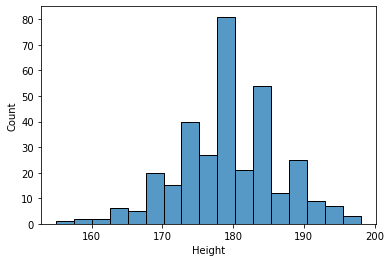

In [17]:
sns.histplot(x='Height', data=df_no_object[df_no_object['Sex'] == 1])
df_no_object.Height[df_no_object['Sex'] == 1].mean()

In [18]:
baixos = df_no_object[df_no_object['Sex'] == 1][df_no_object['Height'] < 179]
alts = df_no_object[df_no_object['Sex'] == 1][df_no_object['Height'] >= 179]

<ipython-input-18-059a529c092c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  baixos = df_no_object[df_no_object['Sex'] == 1][df_no_object['Height'] < 179]
<ipython-input-18-059a529c092c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alts = df_no_object[df_no_object['Sex'] == 1][df_no_object['Height'] >= 179]


In [19]:
# Nombre de registres en cada grup
print('Baixos:', len(baixos))
print('Alts:', len(alts))

Baixos: 159
Alts: 171


In [20]:
from statsmodels.stats import weightstats as stests

ztest, pval1 = stests.ztest(alts.Ewbank_Grade_sent_90perc_routes, 
                            x2=baixos.Ewbank_Grade_sent_90perc_routes, 
                            value=0,alternative='two-sided')

print("P value: ",float(pval1))

if pval1 < 0.05:    # alpha value is 0.05 or 5%
   print("P value es inferior a 0.05 i, per tant, rebutgem la null hypothesis")
else:
  print("P value es superior a 0.05 i, per tant, acceptem la null hypothesis")

P value:  0.23646417226469152
P value es superior a 0.05 i, per tant, acceptem la null hypothesis


In [21]:
baixos.Ewbank_Grade_sent_90perc_routes.mean()

22.21383647798742

In [22]:
alts.Ewbank_Grade_sent_90perc_routes.mean()

21.72514619883041

## Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

**Resposta:** 

*Null Hypothesis (H<sub>0</sub>)*: el nombre de sesions d'escalada a la setmana i d'entrenaments amb [hangboard](https://www.dewoodstok.nl/wp-content/uploads/2020/04/dewoodstok_woodbord_2-510x510.jpg) dels escaladors no influeixen en el grau d'escalada.

*Alternative Hypothesis (H<sub>a</sub>)*: el nombre de sesions d'escalada a la setmana i d'entrenaments amb [hangboard](https://www.dewoodstok.nl/wp-content/uploads/2020/04/dewoodstok_woodbord_2-510x510.jpg) dels escaladors sí que influeixen en el grau d'escalada. Com major és la frequencia, major és el grau.

**Resposta: segons les dades del nostre dataset, rebutgem la null hypothesis, ja que els p values de Freq_climbing_sessions_w i Freq_Hangboard_w son inferiors a 0.05 (com observem a la columna PR(>F) de la taula de la línia 24)**

També s'ha inclòs l'alçada per contrastar els resultats, ja que, com hem descobert en l'exercici anterior, l'alçada no és una variable estadísticament rellevant per determinar el grau de l'escalador. En la taula de la línia 24 es torna a confirmar el cas, amb un p value de 0,12 (superior a l'alfa de 0,05 establert).

In [23]:
df2 = df_no_object

df2['Height'] = pd.cut(df2['Height'], 7)

df2['Height'].value_counts().sort_index()

(152.955, 159.429]     12
(159.429, 165.857]     27
(165.857, 172.286]     57
(172.286, 178.714]    113
(178.714, 185.143]    114
(185.143, 191.571]     45
(191.571, 198.0]       12
Name: Height, dtype: int64

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Ewbank_Grade_sent_90perc_routes ~ C(Freq_climbing_sessions_w)+C(Freq_Hangboard_w)+C(Height)', df2).fit()

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 18, 361) =  4.486, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Freq_climbing_sessions_w),271.185982,6.0,3.699615,0.001395
C(Freq_Hangboard_w),272.210290,6.0,3.713589,0.001350
C(Height),123.788353,6.0,1.688764,0.122640
Residual,4410.285013,361.0,NaN,NaN
